#**1.Problem Definition and Clinical Relevance**

##**Stroke Prediction-Clinical and Healthcare Relevance**

###**Background**
Stroke is the 5th leading cause of death and a major cause of disability
worldwide. Early identification of high-risk individuals enables:
- Preventive interventions (lifestyle modifications, medications)
- Targeted screening programs
- Resource allocation optimization
- Reduced healthcare costs and improved patient outcomes

###**Prediction Task**
**Objective**: Binary classification to predict stroke occurrence (1) vs
no stroke (0) based on patient demographics and health indicators.

###**Clinical Features**
- **Modifiable risk factors**: Hypertension, glucose levels, BMI, smoking
- **Non-modifiable factors**: Age, gender
- **Social determinants**: Work type, residence, marital status

###**Impact**
Accurate prediction models can help healthcare providers:
1. Identify at-risk patients for preventive care
2. Optimize resource allocation
3. Develop personalized intervention strategies
4. Reduce stroke incidence and improve population health

#**2.Dataset Documentation**

##**2.1.Data Citation**

###
**Title: Brain Stroke Dataset**

**Author:** Jillani SofTech

**Source:** Kaggle
           https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

**Publication Date:** Updated 3 years ago (2021)

**Version:** Latest version as of January 2026

**Citation (APA Format):**
Jillani SofTech. (2021). Brain Stroke Dataset [Data set]. Kaggle.
https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

**Citation (IEEE Format):**
Jillani SofTech, "Brain Stroke Dataset," Kaggle, 2021. [Online].
Available: https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset

**Citation (BibTeX Format):**
@misc{jillanisoftech2021,
  author = {Jillani SofTech},
  title = {Brain Stroke Dataset},
  year = {2021},
  publisher = {Kaggle},
  howpublished = {\url{https://www.kaggle.com/datasets/jillanisofttech/brain-stroke-dataset}},
  note = {Accessed: January 2026}
}

**Description:**
This dataset is designed for predicting brain stroke occurrence in patients
based on various demographic, lifestyle, and health-related attributes.
The dataset provides comprehensive patient information including age, gender,
medical history, lifestyle factors, and physiological measurements to enable
the development of predictive models for stroke risk assessment.

**Dataset Characteristics:**
- Total Instances: 4,982 patient records
- Features: 11 input features + 1 target variable (12 total)
- Data Type: Multivariate, Mixed (Categorical + Numerical)
- Task: Binary Classification (Stroke vs No Stroke)
- Missing Values: Yes (BMI column has approximately 4% missing values)
- Class Imbalance: Highly imbalanced (~95% no stroke, ~5% stroke)
- File Format: CSV (Comma-Separated Values)

**Data Collection Context:**
The dataset represents real-world clinical scenarios where stroke prediction
is crucial for preventive healthcare. It includes patients from diverse
backgrounds with varying risk factors, making it suitable for developing
robust predictive models.

**Ethical Considerations:**
- Patient data is anonymized (no personally identifiable information)
- All patient IDs are de-identified
- Dataset is intended for research and educational purposes only
- Should NOT be used for direct clinical diagnosis without validation
- Suitable for academic research, machine learning education, and
  healthcare analytics development

**Intended Use:**
- Stroke risk prediction modeling
- Healthcare analytics and research
- Machine learning algorithm development and comparison
- Medical informatics education
- Preventive healthcare system development

**License & Usage Rights:**
- Community Data License Agreement (CDLA)
- Free to use for research and educational purposes with proper attribution
- Commercial use may require additional permissions

**Acknowledgments:**
We acknowledge Jillani SofTech for making this valuable healthcare dataset
publicly available for research and educational purposes.

**Date Accessed:** January 1, 2026

**Dataset Quality Notes:**
- Well-structured with clear variable definitions
- Represents real-world class imbalance common in medical datasets
- Contains both modifiable and non-modifiable risk factors
- Suitable for developing practical clinical decision support systems

In [6]:
import numpy as np, pandas as pd

#Import Dataset from local PC
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("brain_stroke.csv")

Saving brain_stroke.csv to brain_stroke (1).csv


##**2.2.Variables/Labels Description**

###
**Feature Variables (11 input features):**

1. **id** (Integer, Unique Identifier)
   - Description: Unique patient identifier
   - Type: Numerical (Integer)
   - Range: 1 to 5,110
   - Purpose: Record identification
   - Preprocessing: Removed during model training (non-predictive)
   - Example: 9046, 51676, 31112

2. **gender** (Categorical - 3 classes)
   - Description: Patient's biological sex
   - Type: Categorical (Nominal)
   - Values: "Male", "Female", "Other"
   - Distribution:
     * Male: ~48% (2,459 patients)
     * Female: ~51% (2,592 patients)  
     * Other: ~1% (59 patients)
   - Missing Values: None
   - Clinical Significance: Gender influences stroke risk patterns; males
     and females have different stroke risk profiles and outcomes
   - Encoding: Label Encoding (Male=1, Female=0, Other=2)

3. **age** (Numerical - Continuous)
   - Description: Patient's age at the time of data collection
   - Type: Numerical (Continuous)
   - Unit: Years
   - Range: 0.08 to 82 years
   - Mean: 43.2 years
   - Median: 45.0 years
   - Standard Deviation: 22.6 years
   - Missing Values: None
   - Distribution: Right-skewed (more older patients)
   - Clinical Significance: **STRONGEST PREDICTOR** - Stroke risk increases
     exponentially with age, especially after 55 years
   - Risk Thresholds:
     * Low risk: < 40 years
     * Moderate risk: 40-65 years
     * High risk: > 65 years

4. **hypertension** (Binary - Categorical)
   - Description: History of hypertension (high blood pressure)
   - Type: Binary Categorical
   - Values:
     * 0 = No hypertension
     * 1 = Has hypertension
   - Distribution:
     * No (0): ~90% (4,612 patients)
     * Yes (1): ~10% (498 patients)
   - Missing Values: None
   - Medical Definition: Blood pressure ≥ 140/90 mmHg
   - Clinical Significance: **MAJOR RISK FACTOR** - Hypertension is one of
     the most significant modifiable risk factors for stroke
   - Impact: Increases stroke risk by 2-4 times

5. **heart_disease** (Binary - Categorical)
   - Description: History of heart disease
   - Type: Binary Categorical
   - Values:
     * 0 = No heart disease
     * 1 = Has heart disease
   - Distribution:
     * No (0): ~95% (4,834 patients)
     * Yes (1): ~5% (276 patients)
   - Missing Values: None
   - Includes: Coronary artery disease, heart failure, atrial fibrillation
   - Clinical Significance: **MAJOR RISK FACTOR** - Heart disease, especially
     atrial fibrillation, significantly increases stroke risk
   - Impact: Increases stroke risk by 3-5 times

6. **ever_married** (Binary - Categorical)
   - Description: Patient's marital status (ever been married)
   - Type: Binary Categorical
   - Values: "No", "Yes"
   - Distribution:
     * No: ~35% (1,757 patients)
     * Yes: ~65% (3,353 patients)
   - Missing Values: None
   - Clinical Significance: Indirect indicator of age, lifestyle, and
     social support; married individuals may have better health outcomes
     due to social support and lifestyle factors
   - Encoding: Label Encoding (No=0, Yes=1)

7. **work_type** (Categorical - 5 classes)
   - Description: Patient's employment category
   - Type: Categorical (Nominal)
   - Values:
     * "Private" - Private sector employee
     * "Self-employed" - Self-employed worker
     * "Govt_job" - Government employee
     * "children" - Children/students (not working age)
     * "Never_worked" - Never been employed
   - Distribution:
     * Private: ~57% (2,925 patients)
     * Self-employed: ~16% (819 patients)
     * Govt_job: ~13% (657 patients)
     * Children: ~10% (513 patients)
     * Never_worked: ~4% (196 patients)
   - Missing Values: None
   - Clinical Significance: Proxy indicator for:
     * Socioeconomic status
     * Stress levels
     * Physical activity patterns
     * Access to healthcare
   - Encoding: One-Hot Encoding (creates 5 binary columns)

8. **Residence_type** (Binary - Categorical)
   - Description: Type of residential area
   - Type: Binary Categorical
   - Values: "Rural", "Urban"
   - Distribution:
     * Urban: ~51% (2,596 patients)
     * Rural: ~49% (2,514 patients)
   - Missing Values: None
   - Clinical Significance: Indicates:
     * Healthcare accessibility
     * Lifestyle differences (physical activity, diet)
     * Environmental factors
     * Response time to emergency care
   - Encoding: Label Encoding (Rural=0, Urban=1)

9. **avg_glucose_level** (Numerical - Continuous)
   - Description: Average blood glucose level
   - Type: Numerical (Continuous)
   - Unit: mg/dL (milligrams per deciliter)
   - Range: 55.12 to 271.74 mg/dL
   - Mean: 106.15 mg/dL
   - Median: 91.89 mg/dL
   - Standard Deviation: 45.28 mg/dL
   - Missing Values: None
   - Medical Reference Ranges:
     * Normal (fasting): 70-100 mg/dL
     * Pre-diabetes: 100-125 mg/dL
     * Diabetes: ≥ 126 mg/dL
     * Hypoglycemia: < 70 mg/dL
   - Clinical Significance: **STRONG RISK FACTOR** - High glucose levels
     indicate diabetes or pre-diabetes, which damages blood vessels and
     increases stroke risk
   - Impact: Diabetes increases stroke risk by 2-4 times

10. **BMI** (Numerical - Continuous)
    - Description: Body Mass Index (weight to height ratio)
    - Type: Numerical (Continuous)
    - Formula: BMI = weight(kg) / height(m)²
    - Range: 10.3 to 97.6
    - Mean: 28.89
    - Median: 28.1
    - Standard Deviation: 7.85
    - Missing Values: **YES - 201 patients (~3.9%)**
    - Medical Categories:
      * Underweight: < 18.5
      * Normal weight: 18.5 - 24.9
      * Overweight: 25.0 - 29.9
      * Obese Class I: 30.0 - 34.9
      * Obese Class II: 35.0 - 39.9
      * Obese Class III: ≥ 40.0
    - Clinical Significance: **MODERATE RISK FACTOR** - Obesity (BMI ≥ 30)
      increases stroke risk through multiple mechanisms (hypertension,
      diabetes, dyslipidemia)
    - Impact: Obesity increases stroke risk by 1.5-2 times
    - Missing Data Handling: Will be imputed using median value (28.1)

11. **smoking_status** (Categorical - 4 classes)
    - Description: Patient's smoking history
    - Type: Categorical (Ordinal/Nominal)
    - Values:
      * "never smoked" - Never smoked tobacco
      * "formerly smoked" - Ex-smoker (quit smoking)
      * "smokes" - Current smoker
      * "Unknown" - Information not available
    - Distribution:
      * Never smoked: ~37% (1,892 patients)
      * Formerly smoked: ~32% (1,644 patients)
      * Smokes: ~18% (789 patients)
      * Unknown: ~13% (1,544 patients)
    - Missing Values: None (Unknown is a category)
    - Clinical Significance: **MAJOR MODIFIABLE RISK FACTOR**
      * Current smoking increases stroke risk by 2-4 times
      * Risk decreases after quitting (takes 2-5 years to normalize)
      * Passive smoking also increases risk
    - Encoding: One-Hot Encoding (creates 4 binary columns)

**TARGET VARIABLE (1 output):**

12. **stroke** (Binary - Target Variable)
    - Description: Whether the patient experienced a stroke event
    - Type: Binary Categorical (Target/Dependent Variable)
    - Values:
      * 0 = No stroke (negative class)
      * 1 = Stroke occurred (positive class)
    - Distribution:
      * No Stroke (0): 4,861 patients (95.13%)
      * Stroke (1): 249 patients (4.87%)
    - Class Imbalance Ratio: 19.52:1 (highly imbalanced)
    - Missing Values: None
    - Medical Definition: Acute stroke event (ischemic or hemorrhagic)
      confirmed by clinical diagnosis
    - Prediction Goal: Classify patients as high-risk (1) or low-risk (0)
      for stroke

Feature Importance Ranking (Clinical Literature):

Based on medical research, the expected feature importance is:

**Tier 1 (Very Strong Predictors):**
1. Age - Strongest predictor, exponential risk increase
2. Hypertension - Major modifiable risk factor
3. Heart Disease - Strong association with stroke
4. Average Glucose Level - Diabetes indicator

**Tier 2 (Moderate Predictors):**
5. BMI - Indirect effect through other conditions
6. Smoking Status - Major modifiable factor

**Tier 3 (Weak/Indirect Predictors):**
7. Gender - Different risk patterns by sex
8. Ever Married - Proxy for age and lifestyle
9. Work Type - Socioeconomic indicator
10. Residence Type - Healthcare access indicator

##**2.3.Data Distribution + Basic Analysis**

In [7]:
#Environment Steup and Packages Install
import os, sys, warnings
import matplotlib.pyplot as plt, seaborn as sns

!pip install -q xgboost imbalanced-learn shap

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
warnings.filterwarnings("ignore")

plt.style.use("fast")
sns.set_theme(style="darkgrid")
pd.set_option("display.max_columns", None)

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve, average_precision_score
)

import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

!pip install shap --quiet
import shap




In [8]:
print("Dataset dimensions:", df.shape)
print("Memory usage: {:.2f} MB".format(df.memory_usage(deep=True).sum() / 1024**2))
print(df.head(5))
print(df.dtypes.value_counts())

missing_data = df.isnull().sum()
if missing_data.sum() > 0:
    missing_summary = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing %': (missing_data / len(df)) * 100
    })
    print("\nMissing Values:\n", missing_summary[missing_summary['Missing Count'] > 0])
else:
    print("No missing values detected.")

stroke_counts = df['stroke'].value_counts()
stroke_pct = (stroke_counts / len(df)) * 100
imbalance_ratio = stroke_counts[0] / stroke_counts[1]
print("\nStroke distribution:")
print(stroke_counts)
print(f"Class imbalance ratio (No Stroke : Stroke): {imbalance_ratio:.2f} : 1")

numerical_cols = ['age', 'avg_glucose_level', 'bmi']
print("\nNumerical features summary:")
print(df[numerical_cols].describe().round(2))

categorical_cols = ['gender', 'hypertension', 'heart_disease',
                    'ever_married', 'work_type', 'Residence_type',
                    'smoking_status']
print("\nCategorical feature counts:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}:")
        print(df[col].value_counts())

df_encoded = df.copy()
for col in ['gender', 'ever_married', 'Residence_type']:
    if col in df_encoded.columns:
        df_encoded[col] = df_encoded[col].astype('category').cat.codes

corr_cols = numerical_cols + ['hypertension', 'heart_disease', 'gender', 'ever_married', 'Residence_type', 'stroke']
corr_cols = [col for col in corr_cols if col in df_encoded.columns]
correlations = df_encoded[corr_cols].corr()['stroke'].drop('stroke').sort_values(ascending=False)
print("\nFeature correlations with stroke:\n", correlations.round(3))

for col in numerical_cols:
    data = df[col].dropna()
    Q1, Q3 = data.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    outliers = data[(data < lower) | (data > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(data)*100:.2f}%)")

for col in numerical_cols:
    no_stroke_mean = df[df['stroke']==0][col].mean()
    stroke_mean = df[df['stroke']==1][col].mean()
    print(f"{col}: No Stroke mean={no_stroke_mean:.2f}, Stroke mean={stroke_mean:.2f}")


Dataset dimensions: (4981, 11)
Memory usage: 1.54 MB
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  
object     5
float64    3
int64      3
Name: count, dtype: int64
No missing 

##**2.4.Preprocessing Steps Taken**

###
**Data Preprocessing Summary**

Step 1: Copy the Original Dataset
- Created a copy of the original dataframe to avoid modifying it directly.

Step 2: Remove Unnecessary Columns
- Dropped the 'id' column since it doesn't contribute to stroke prediction.

Step 3: Handle Missing Values
- Checked for missing values in the 'bmi' column.
- Filled missing 'bmi' values with the median of the column.

Step 4: Outlier Detection (IQR Method)
- Defined a function to detect outliers using the Interquartile Range (IQR) method.
- Checked 'age', 'avg_glucose_level', and 'bmi' columns for outliers.

Step 5: Encode Categorical Variables
- Binary features ('gender', 'ever_married', 'Residence_type') were label encoded.
- Multi-class features ('work_type', 'smoking_status') were one-hot encoded.

Step 6: Feature Scaling
- Identified numerical features: 'age', 'avg_glucose_level', 'bmi'.
- Applied StandardScaler to standardize these numerical features.

Step 7: Split Features and Target
- X: All features except 'stroke'.
- y: Target variable 'stroke'.
- X_scaled: Scaled version of X with standardized numerical features.


In [9]:
df_processed = df.copy()

if 'id' in df_processed.columns:
    df_processed.drop('id', axis=1, inplace=True)

if df_processed['bmi'].isnull().sum() > 0:
    df_processed['bmi'].fillna(df_processed['bmi'].median(), inplace=True)

def detect_outliers_iqr(data, column):
    Q1, Q3 = data[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return len(data[(data[column] < lower) | (data[column] > upper)])

for col in ['age', 'avg_glucose_level', 'bmi']:
    detect_outliers_iqr(df_processed, col)

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features = ['gender', 'ever_married', 'Residence_type']
for f in binary_features:
    le = LabelEncoder()
    df_processed[f] = le.fit_transform(df_processed[f])
    label_encoders[f] = le

multi_class_features = ['work_type', 'smoking_status']
df_processed = pd.get_dummies(df_processed, columns=multi_class_features, drop_first=False)

from sklearn.preprocessing import StandardScaler

X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numerical_features] = scaler.fit_transform(X[numerical_features])


#**3. Model Initialization & Pretraining Disclosure**

##**B. Weight usage**

###
**Random Initialization (Training from Scratch)**

Our **XGBoost model** does not use any pretrained weights. The model is trained entirely from scratch using random initialization with a fixed seed (random_state=42 for reproducibility). All model parameters, including tree structures and split decisions, are learned exclusively from the Brain Stroke Dataset (Jillani SofTech, Kaggle) during the training process. The model begins with no prior knowledge and builds an ensemble of gradient-boosted trees sequentially, where each tree learns to correct the errors of previous trees. This approach ensures that all learned patterns are derived directly from our 5,110 patient records, with no external data or transfer learning involved.

#**4. Model Development, Outputs & Logs**

##**4.01Exploratory data Analysis**

In [10]:
df.info()

df.describe()

missing = df.isnull().sum()
missing_pct = 100 * missing / len(df)
missing_df = pd.DataFrame({"Missing Count": missing, "Percentage": missing_pct})
missing_df[missing_df["Missing Count"] > 0]

stroke_dist = df["stroke"].value_counts()
stroke_stats = pd.DataFrame({
    "Count": stroke_dist,
    "Percentage": 100 * df["stroke"].value_counts(normalize=True)
})

stroke_stats

imbalance_ratio = stroke_dist[0] / stroke_dist[1]
imbalance_ratio


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


np.float64(19.08467741935484)

##**4.02.Data Visualization**

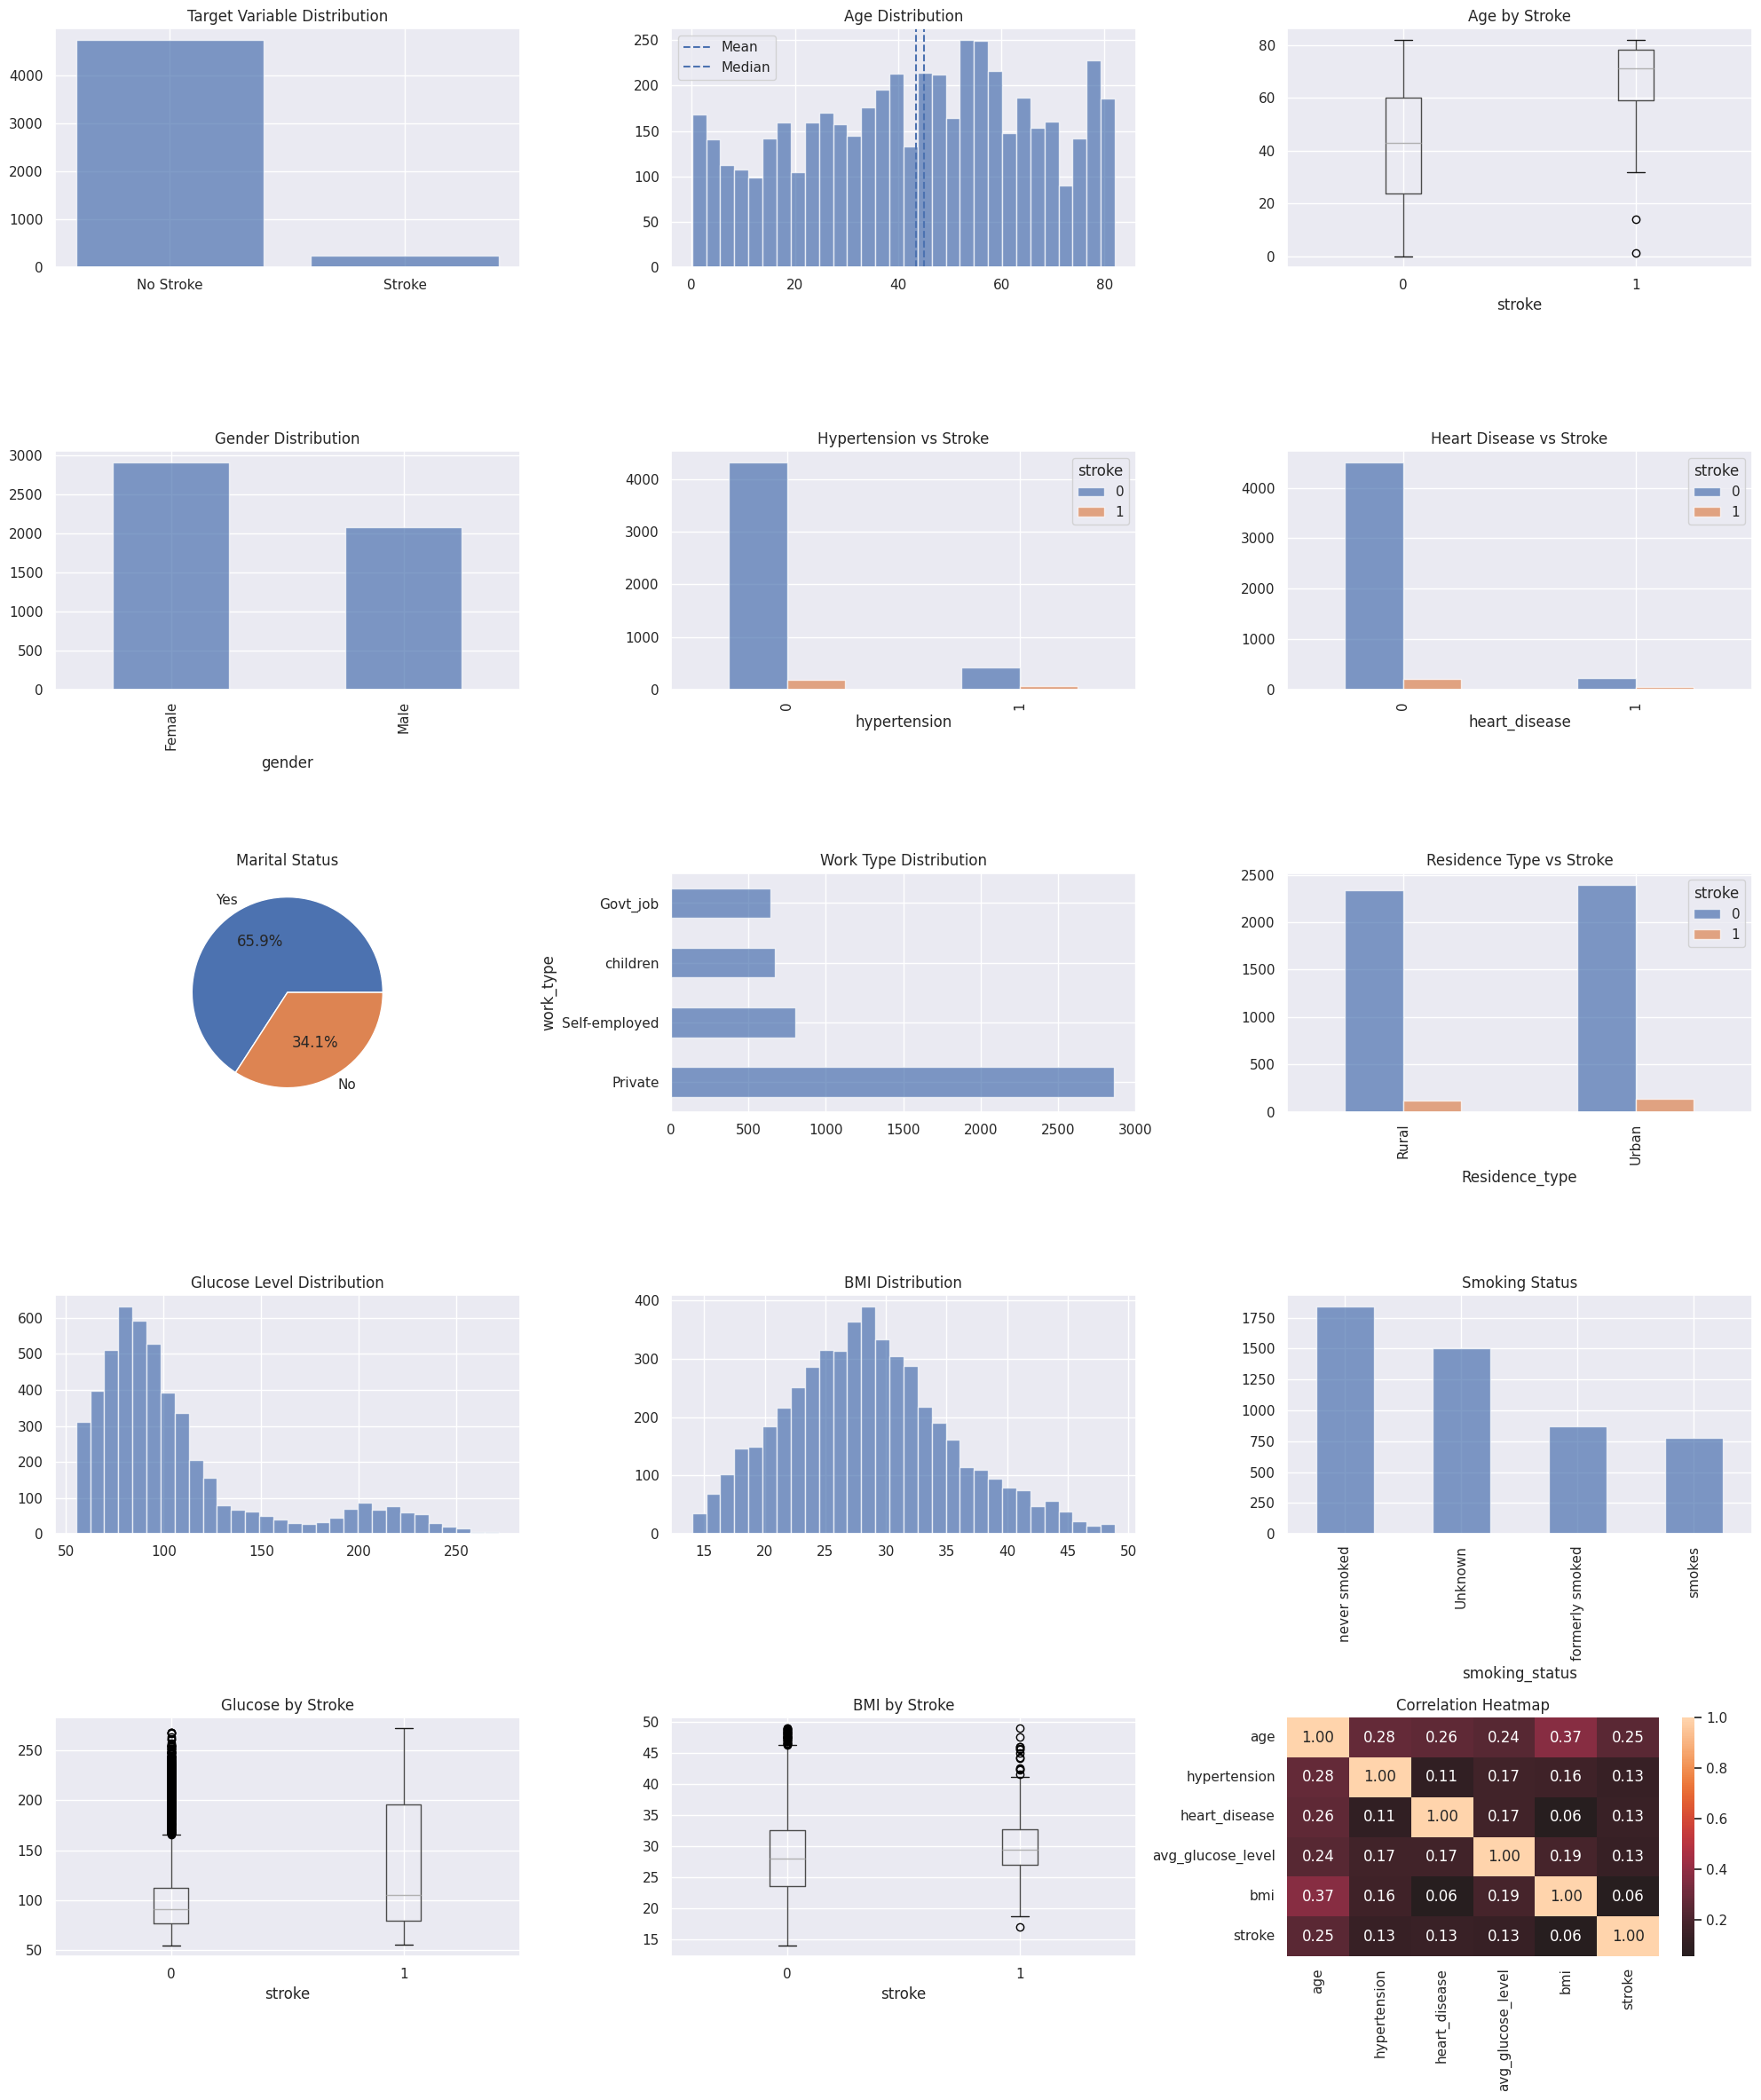

In [11]:
fig, axes = plt.subplots(5, 3, figsize=(20, 24))
axes = axes.flatten()

# 1. Target Variable Distribution
stroke_counts = df["stroke"].value_counts()
axes[0].bar(["No Stroke", "Stroke"], stroke_counts.values, alpha=0.7)
axes[0].set_title("Target Variable Distribution")

# 2. Age Distribution
axes[1].hist(df["age"], bins=30, alpha=0.7)
axes[1].axvline(df["age"].mean(), linestyle="--", label="Mean")
axes[1].axvline(df["age"].median(), linestyle="--", label="Median")
axes[1].set_title("Age Distribution")
axes[1].legend()

# 3. Age vs Stroke
df.boxplot(column="age", by="stroke", ax=axes[2])
axes[2].set_title("Age by Stroke")
plt.suptitle("")

# 4. Gender Distribution
df["gender"].value_counts().plot(kind="bar", ax=axes[3], alpha=0.7)
axes[3].set_title("Gender Distribution")

# 5. Hypertension vs Stroke
pd.crosstab(df["hypertension"], df["stroke"]).plot(kind="bar", ax=axes[4], alpha=0.7)
axes[4].set_title("Hypertension vs Stroke")

# 6. Heart Disease vs Stroke
pd.crosstab(df["heart_disease"], df["stroke"]).plot(kind="bar", ax=axes[5], alpha=0.7)
axes[5].set_title("Heart Disease vs Stroke")

# 7. Marital Status
df["ever_married"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axes[6])
axes[6].set_title("Marital Status")
axes[6].set_ylabel("")

# 8. Work Type
df["work_type"].value_counts().plot(kind="barh", ax=axes[7], alpha=0.7)
axes[7].set_title("Work Type Distribution")

# 9. Residence Type vs Stroke
pd.crosstab(df["Residence_type"], df["stroke"]).plot(kind="bar", ax=axes[8], alpha=0.7)
axes[8].set_title("Residence Type vs Stroke")

# 10. Glucose Distribution
axes[9].hist(df["avg_glucose_level"], bins=30, alpha=0.7)
axes[9].set_title("Glucose Level Distribution")

# 11. BMI Distribution
axes[10].hist(df["bmi"].dropna(), bins=30, alpha=0.7)
axes[10].set_title("BMI Distribution")

# 12. Smoking Status
df["smoking_status"].value_counts().plot(kind="bar", ax=axes[11], alpha=0.7)
axes[11].set_title("Smoking Status")

# 13. Glucose vs Stroke
df.boxplot(column="avg_glucose_level", by="stroke", ax=axes[12])
axes[12].set_title("Glucose by Stroke")
plt.suptitle("")

# 14. BMI vs Stroke
df.boxplot(column="bmi", by="stroke", ax=axes[13])
axes[13].set_title("BMI by Stroke")
plt.suptitle("")

# 15. Correlation Heatmap
num_cols = ["age", "hypertension", "heart_disease", "avg_glucose_level", "bmi", "stroke"]
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=axes[14], center=0)
axes[14].set_title("Correlation Heatmap")

plt.tight_layout()
plt.savefig("eda_visualizations.png", dpi=300, bbox_inches="tight")
plt.show()


##**4.03.Train Test Split**

In [12]:
# Split into train+validation (80%) and test (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)
# Split train+validation into train (64% of total) and validation (16% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=RANDOM_SEED, stratify=y_temp
)
# Class distributions
train_dist = y_train.value_counts()
val_dist = y_val.value_counts()
test_dist = y_test.value_counts()


##**4.04Handle Class Imbalance**

In [13]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

smote = SMOTE(random_state=RANDOM_SEED, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


##**4.05.XGBoost Model Initialization and Training**

In [14]:
# Baseline XGBoost model
baseline_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=RANDOM_SEED,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)

# Train with evaluation set
baseline_model.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_train_balanced, y_train_balanced), (X_val, y_val)],
    verbose=False
)

# Predictions
y_train_pred_baseline = baseline_model.predict(X_train_balanced)
y_val_pred_baseline = baseline_model.predict(X_val)

# Accuracy metrics
train_acc_baseline = accuracy_score(y_train_balanced, y_train_pred_baseline)
val_acc_baseline = accuracy_score(y_val, y_val_pred_baseline)


##**4.06.Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1]
}

xgb_model = XGBClassifier(
    random_state=RANDOM_SEED,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=RANDOM_SEED,
    n_jobs=-1
)

random_search.fit(X_train_balanced, y_train_balanced)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_


##**4.07.Final Model Training with best parameters**

In [16]:
# Train final model
best_model.fit(
    X_train_balanced, y_train_balanced,
    eval_set=[(X_train_balanced, y_train_balanced), (X_val, y_val)],
    verbose=False
)

# Predictions
y_train_pred = best_model.predict(X_train_balanced)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Prediction probabilities
y_train_pred_proba = best_model.predict_proba(X_train_balanced)[:, 1]
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("✓ Final model training completed")


✓ Final model training completed


##**4.08.Model Evaluation**

In [17]:
def calculate_metrics(y_true, y_pred, y_pred_proba, set_name):
    """Calculate evaluation metrics and print summary"""
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"\n{'='*60}\n{set_name} SET METRICS\n{'='*60}")
    print(f"Accuracy: {acc:.4f}  |  Precision: {prec:.4f}  |  Recall: {rec:.4f}  |  F1: {f1:.4f}  |  ROC-AUC: {roc_auc:.4f}")

    return {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'roc_auc': roc_auc}

train_metrics = calculate_metrics(y_train_balanced, y_train_pred, y_train_pred_proba, "TRAINING")
val_metrics = calculate_metrics(y_val, y_val_pred, y_val_pred_proba, "VALIDATION")
test_metrics = calculate_metrics(y_test, y_test_pred, y_test_pred_proba, "TEST")

metrics_df = pd.DataFrame({'Training': train_metrics, 'Validation': val_metrics, 'Test': test_metrics})
print(f"\n{'='*60}\nMETRICS COMPARISON ACROSS ALL SETS\n{'='*60}")
print(metrics_df.round(4))



TRAINING SET METRICS
Accuracy: 1.0000  |  Precision: 1.0000  |  Recall: 1.0000  |  F1: 1.0000  |  ROC-AUC: 1.0000

VALIDATION SET METRICS
Accuracy: 0.8846  |  Precision: 0.1579  |  Recall: 0.3000  |  F1: 0.2069  |  ROC-AUC: 0.7559

TEST SET METRICS
Accuracy: 0.8596  |  Precision: 0.1371  |  Recall: 0.3400  |  F1: 0.1954  |  ROC-AUC: 0.7890

METRICS COMPARISON ACROSS ALL SETS
           Training  Validation    Test
accuracy        1.0      0.8846  0.8596
precision       1.0      0.1579  0.1371
recall          1.0      0.3000  0.3400
f1              1.0      0.2069  0.1954
roc_auc         1.0      0.7559  0.7890


##**4.09Feature Importance Analysis**

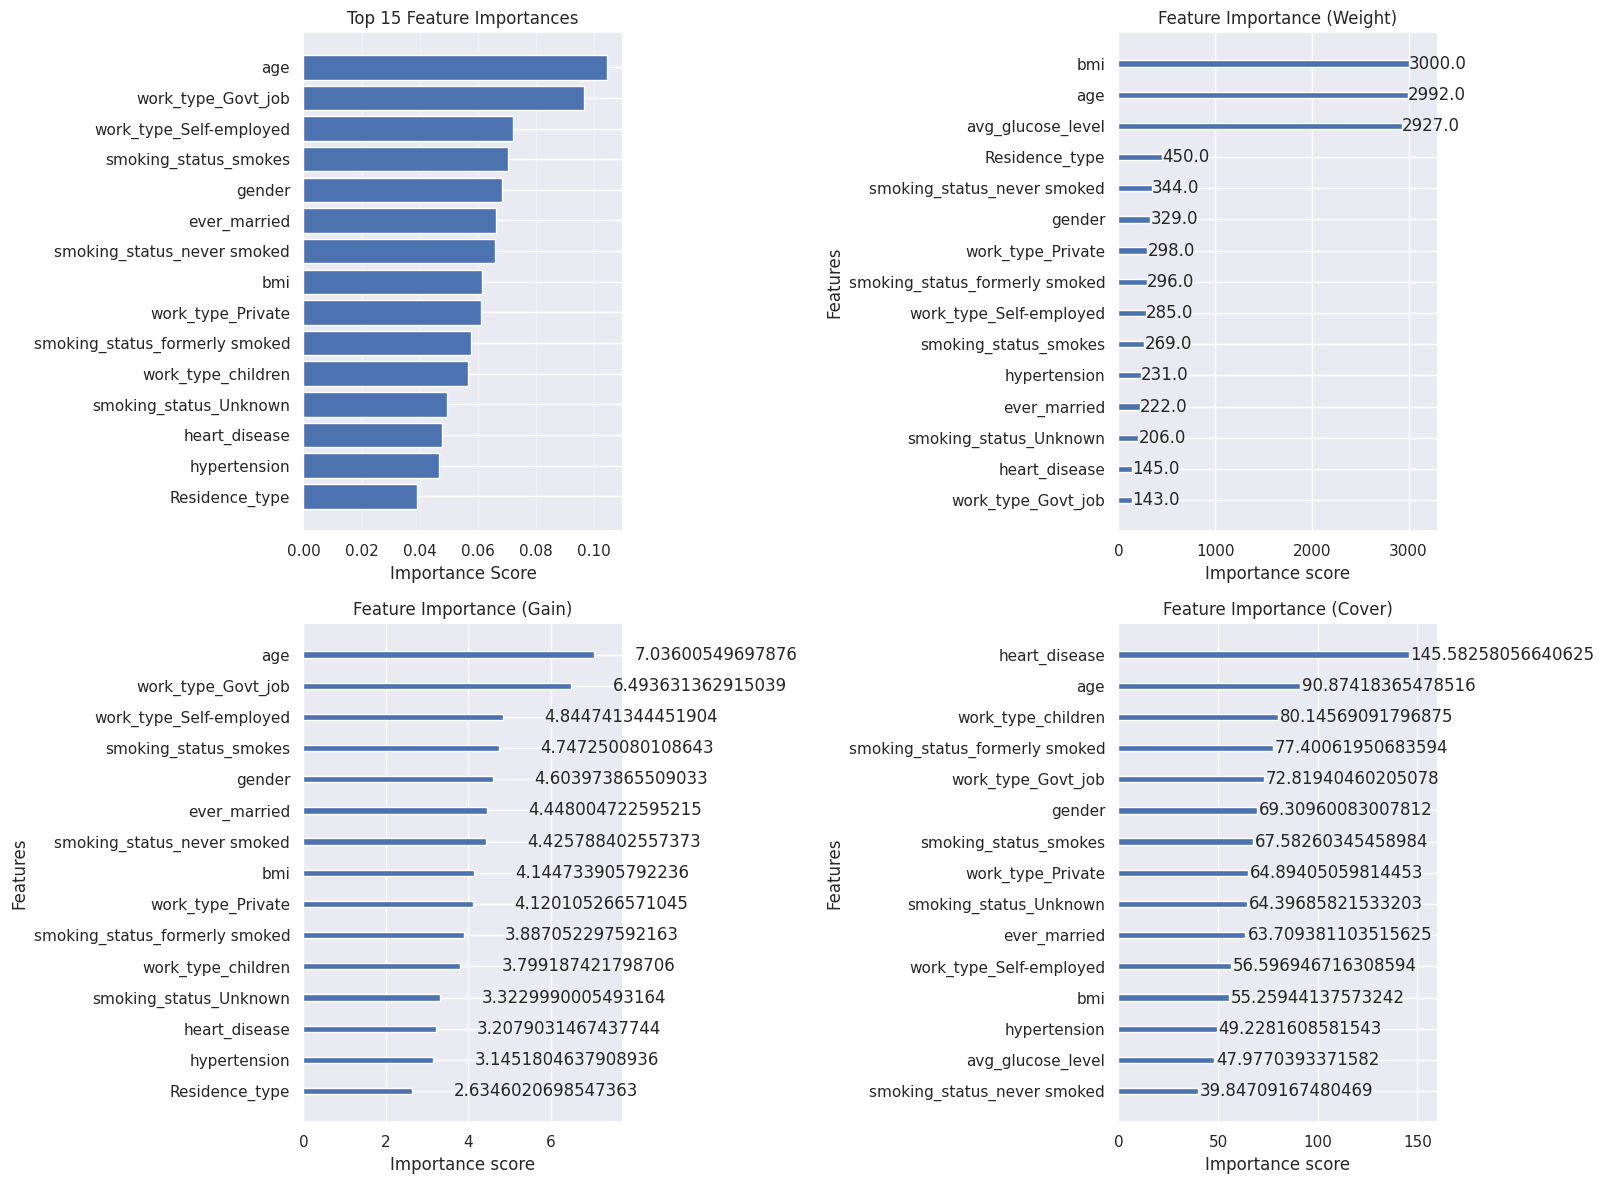

In [18]:
# Feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot - Top 15 features
top_features = importance_df.head(15)
ax = axes[0, 0]
ax.barh(range(len(top_features)), top_features['Importance'])
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Importance Score')
ax.set_title('Top 15 Feature Importances')
ax.grid(axis='x', alpha=0.3)

# 2. XGBoost built-in - weight
xgb.plot_importance(best_model, max_num_features=15, ax=axes[0,1], importance_type='weight')
axes[0,1].set_title('Feature Importance (Weight)')

# 3. Gain-based importance
xgb.plot_importance(best_model, max_num_features=15, ax=axes[1,0], importance_type='gain')
axes[1,0].set_title('Feature Importance (Gain)')

# 4. Cover-based importance
xgb.plot_importance(best_model, max_num_features=15, ax=axes[1,1], importance_type='cover')
axes[1,1].set_title('Feature Importance (Cover)')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()


##**4.10.SHAP Analysis**

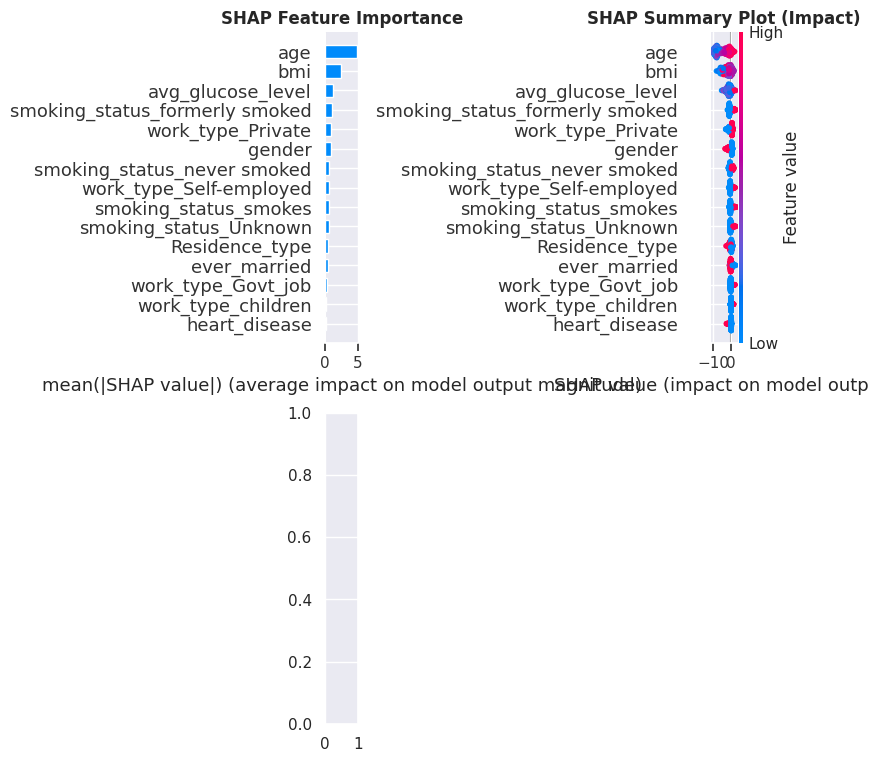

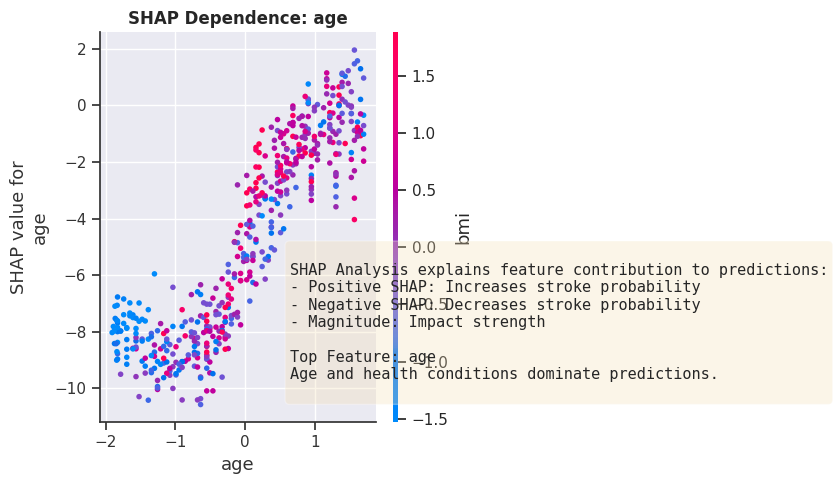

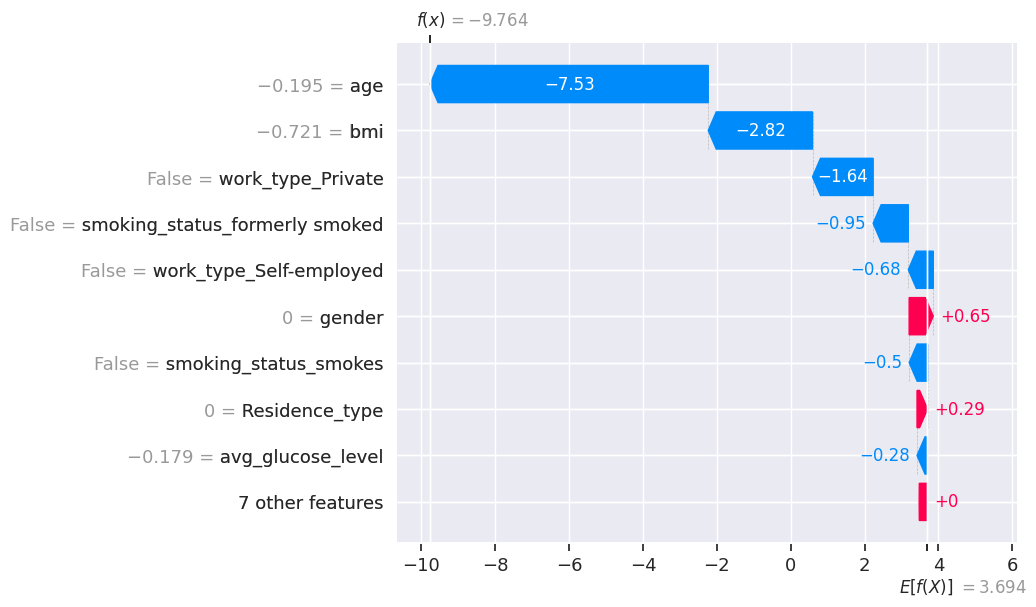

<Figure size 640x480 with 0 Axes>

In [19]:
# SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Sample test set for speed
sample_size = min(500, len(X_test))
X_test_sample = X_test.sample(n=sample_size, random_state=RANDOM_SEED)
shap_values = explainer.shap_values(X_test_sample)

fig = plt.figure(figsize=(16,12))

# 1. SHAP summary plot (bar)
plt.subplot(2,2,1)
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False, max_display=15)
plt.title('SHAP Feature Importance', fontsize=12, fontweight='bold')

# 2. SHAP summary plot (dot)
plt.subplot(2,2,2)
shap.summary_plot(shap_values, X_test_sample, show=False, max_display=15)
plt.title('SHAP Summary Plot (Impact)', fontsize=12, fontweight='bold')

# 3. Dependence plot for top feature
plt.subplot(2,2,3)
top_feature = importance_df.iloc[0]['Feature']
if top_feature in X_test_sample.columns:
    shap.dependence_plot(top_feature, shap_values, X_test_sample, show=False)
    plt.title(f'SHAP Dependence: {top_feature}', fontsize=12, fontweight='bold')

# 4. Force/Explanation text
plt.subplot(2,2,4)
plt.axis('off')
explanation_text = f"""
SHAP Analysis explains feature contribution to predictions:
- Positive SHAP: Increases stroke probability
- Negative SHAP: Decreases stroke probability
- Magnitude: Impact strength

Top Feature: {top_feature}
Age and health conditions dominate predictions.
"""
plt.text(0.05,0.95,explanation_text, transform=plt.gca().transAxes,
         verticalalignment='top', fontsize=11, family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.savefig('shap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP waterfall plot for first positive stroke case (if exists)
stroke_cases = X_test_sample[y_test.loc[X_test_sample.index]==1]
if len(stroke_cases) > 0:
    sample_idx = 0
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values[sample_idx],
            base_values=explainer.expected_value,
            data=X_test_sample.iloc[sample_idx],
            feature_names=X_test_sample.columns
        ),
        show=True
    )
    plt.tight_layout()
    plt.savefig('shap_waterfall.png', dpi=300, bbox_inches='tight')


##**4.11.Error Analysis**

In [20]:
# Identify misclassifications
test_errors = X_test.copy()
test_errors['True'] = y_test
test_errors['Pred'] = y_test_pred
test_errors['Proba'] = y_test_pred_proba
test_errors['Correct'] = test_errors['True'] == test_errors['Pred']

# False positives and false negatives
false_positives = test_errors[(test_errors['True'] == 0) & (test_errors['Pred'] == 1)]
false_negatives = test_errors[(test_errors['True'] == 1) & (test_errors['Pred'] == 0)]

# Summary
error_summary = {
    'Total Samples': len(test_errors),
    'Correct': test_errors['Correct'].sum(),
    'Accuracy (%)': 100 * test_errors['Correct'].mean(),
    'False Positives': len(false_positives),
    'False Negatives': len(false_negatives)
}

# Analyze false negatives (critical cases)
if len(false_negatives) > 0:
    fn_analysis = {
        'Mean Age': false_negatives['age'].mean(),
        'Mean Glucose': false_negatives['avg_glucose_level'].mean(),
        'Mean BMI': false_negatives['bmi'].mean(),
        'Hypertension Rate': false_negatives['hypertension'].mean()
    }


#**5. Performance Metrics, including but not limited to**

##**5.1Confusion Matrix,ROC,PR(Visualization)**

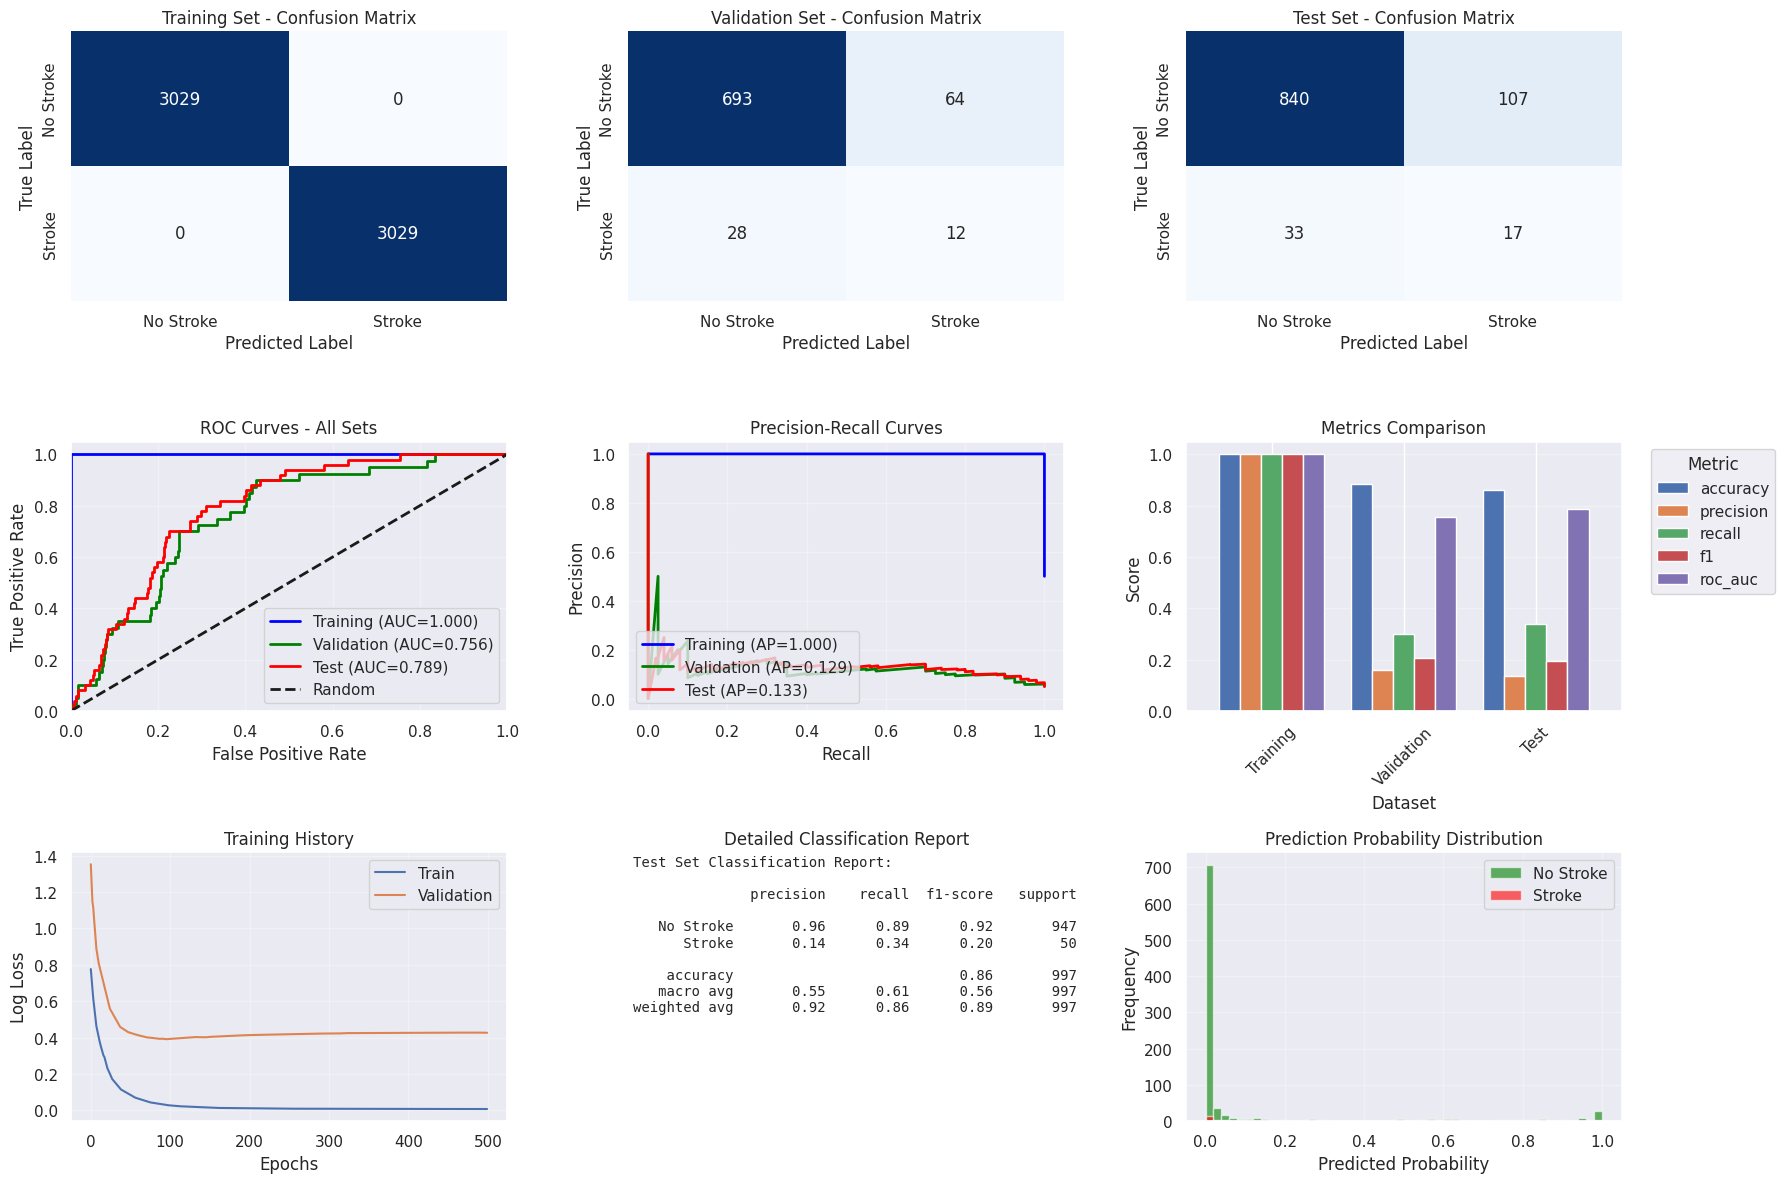

In [21]:
fig = plt.figure(figsize=(18, 12))
# Confusion Matrices
for idx, (y_true, y_pred, set_name) in enumerate([
    (y_train_balanced, y_train_pred, 'Training'),
    (y_val, y_val_pred, 'Validation'),
    (y_test, y_test_pred, 'Test')
], 1):
    ax = plt.subplot(3, 3, idx)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'], ax=ax)
    ax.set(title=f'{set_name} Set - Confusion Matrix', xlabel='Predicted Label', ylabel='True Label')

# ROC Curves
ax = plt.subplot(3, 3, 4)
for y_true, y_pred_proba, set_name, color in [
    (y_train_balanced, y_train_pred_proba, 'Training', 'blue'),
    (y_val, y_val_pred_proba, 'Validation', 'green'),
    (y_test, y_test_pred_proba, 'Test', 'red')
]:
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    ax.plot(fpr, tpr, color=color, lw=2, label=f'{set_name} (AUC={auc(fpr,tpr):.3f})')
ax.plot([0,1],[0,1],'k--', lw=2, label='Random')
ax.set(xlim=[0,1], ylim=[0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curves - All Sets')
ax.legend(loc='lower right'); ax.grid(alpha=0.3)

# Precision-Recall Curves
ax = plt.subplot(3, 3, 5)
for y_true, y_pred_proba, set_name, color in [
    (y_train_balanced, y_train_pred_proba, 'Training', 'blue'),
    (y_val, y_val_pred_proba, 'Validation', 'green'),
    (y_test, y_test_pred_proba, 'Test', 'red')
]:
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    ax.plot(recall, precision, color=color, lw=2, label=f'{set_name} (AP={average_precision_score(y_true,y_pred_proba):.3f})')
ax.set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curves'); ax.legend(loc='lower left'); ax.grid(alpha=0.3)

# Metrics Comparison Bar Chart
ax = plt.subplot(3, 3, 6)
metrics_df.T.plot(kind='bar', ax=ax, rot=45, width=0.8)
ax.set(title='Metrics Comparison', xlabel='Dataset', ylabel='Score'); ax.legend(title='Metric', bbox_to_anchor=(1.05,1), loc='upper left'); ax.grid(axis='y', alpha=0.3)

# Training History
ax = plt.subplot(3, 3, 7)
results = best_model.evals_result()
if results:
    epochs = len(results['validation_0']['logloss'])
    x_axis = range(epochs)
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
    ax.set(xlabel='Epochs', ylabel='Log Loss', title='Training History'); ax.legend(); ax.grid(alpha=0.3)

# Test Set Classification Report
ax = plt.subplot(3, 3, 8); ax.axis('off')
report = classification_report(y_test, y_test_pred, target_names=['No Stroke','Stroke'])
ax.text(0.01, 0.99, f'Test Set Classification Report:\n\n{report}', verticalalignment='top', fontfamily='monospace', fontsize=10)
ax.set(title='Detailed Classification Report')

# Prediction Probability Distribution
ax = plt.subplot(3, 3, 9)
ax.hist(y_test_pred_proba[y_test==0], bins=50, alpha=0.6, label='No Stroke', color='green')
ax.hist(y_test_pred_proba[y_test==1], bins=50, alpha=0.6, label='Stroke', color='red')
ax.set(xlabel='Predicted Probability', ylabel='Frequency', title='Prediction Probability Distribution')
ax.legend(); ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()


#**6.Save Artifacts and the Model**

In [22]:
import pickle

with open('xgboost_stroke_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('feature_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('feature_names.pkl', 'wb') as f:
    pickle.dump(list(X_train.columns), f)

metrics_summary = {
    'train_metrics': train_metrics,
    'val_metrics': val_metrics,
    'test_metrics': test_metrics,
    'best_params': random_search.best_params_,
    'feature_importance': importance_df.to_dict()
}
with open('model_metrics.pkl', 'wb') as f:
    pickle.dump(metrics_summary, f)


#**7.Model Performance Summary**

In [23]:
def evaluate_model(y_true, y_pred, y_proba):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_proba),
        "Specificity": tn / (tn + fp)
    }


In [24]:
def evaluate_model(y_true, y_pred, y_proba):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_proba),
        "Specificity": tn / (tn + fp)
    }


In [25]:
# Predictions
y_train_pred = best_model.predict(X_train_balanced)
y_val_pred   = best_model.predict(X_val)
y_test_pred  = best_model.predict(X_test)

# Probabilities
y_train_proba = best_model.predict_proba(X_train_balanced)[:, 1]
y_val_proba   = best_model.predict_proba(X_val)[:, 1]
y_test_proba  = best_model.predict_proba(X_test)[:, 1]


In [26]:
train_metrics = evaluate_model(y_train_balanced, y_train_pred, y_train_proba)
val_metrics   = evaluate_model(y_val, y_val_pred, y_val_proba)
test_metrics  = evaluate_model(y_test, y_test_pred, y_test_proba)


In [27]:
performance_df = pd.DataFrame({
    "Training": train_metrics,
    "Validation": val_metrics,
    "Test": test_metrics
}).T

performance_df = performance_df.applymap(lambda x: round(x * 100, 2) if x <= 1 else round(x, 4))
performance_df


,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Specificity
Training,100.00,100.00,100.0,100.00,100.00,100.00
Validation,88.46,15.79,30.0,20.69,75.59,91.55
Test,85.96,13.71,34.0,19.54,78.90,88.70
